In [1]:
import plotly.express as px
import pandas as pd

https://public.opendatasoft.com/explore/dataset/significant-volcanic-eruption-database/export/

 This dataset is licensed under : U.S. Government Work 
    
    https://www.usa.gov/government-works
    
   The Significant Volcanic Eruption Database is a global listing of over 500 significant eruptions which includes information on the latitude, longitude, elevation, type of volcano, and last known eruption. A significant eruption is classified as one that meets at least one of the following criteria: caused fatalities, caused moderate damage (approximately $1 million or more), with a Volcanic Explosivity Index (VEI) of 6 or larger, caused a tsunami, or was associated with a major earthquake.

## Data preparation

In [2]:
df = pd.read_csv('significant-volcanic-eruption-database.csv', delimiter=';')
df = df.dropna(axis=1, how='all')

df = df.replace(
    {
        'Flag Tsunami': {'Tsunami': True, None: False},
        'Flag Earthquake': {'Earthquake': True, None: False},
    }
               )

In [3]:
df['Latitude'] = df['Coordinates'].apply(lambda x: x.split(',')[0]).astype(float)
df['Longitude'] = df['Coordinates'].apply(lambda x: x.split(',')[1]).astype(float)

In [4]:
df = df.fillna({'Volcanic Explosivity Index': 0, 'Volcano : Deaths': 0, 'Total Effects : Deaths': 0})

df = df.drop(columns=['Total Effects : Houses Destroyed', 'Total Effects : Houses Destroyed Description',
                      'Total Effects : Missing', 'Total Effects : Missing Description',
                      'Total Effects : Injuries', 'Total Effects : Injuries Description',
                      'Total Effects : Damages in million Dollars', 'Total Effects : Damage Description',
                      'Volcano : Houses destroyed', 'Volcano : Houses destroyed Description',
                      'Volcano : Missing', 'Volcano : Missing Description',
                      'Volcano : Injuries', 'Volcano : Injuries Description',
                      'Volcano : Damage (in M$)', 'Volcano : Damage Description',
                      'Volcano : Deaths Description', 'Total Effects : Deaths Description',
                      'Month', 'Day', 'Status', 'Coordinates', 'Location',
                     ])

In [5]:
df

Year  Flag Tsunami  Flag Earthquake     Volcano Name           Country  \
0    1280         False            False         Quilotoa           Ecuador   
1    1540          True            False        Augustine     United States   
2    1660          True            False      Long Island  Papua New Guinea   
3    1858         False             True        Tate-yama             Japan   
4    1864         False            False            Kelut         Indonesia   
..    ...           ...              ...              ...               ...   
830  2006          True            False  Soufriere Hills        Montserrat   
831  2015         False            False          Calbuco             Chile   
832  2017         False            False    Campi Flegrei             Italy   
833  2018         False            False          Kadovar  Papua New Guinea   
834  2018         False            False             Ijen         Indonesia   

     Elevation     Volcano Type  Volcanic Explosivity Index  Volcano : Deaths  \
0         3914          Caldera                         6.0               0.0   
1         1252        Lava dome                         4.0               0.0   
2         1280  Complex volcano                         6.0            2000.0   
3         2621    Stratovolcano                         0.0               0.0   
4         1731    Stratovolcano                         2.0              54.0   
..         ...              ...                         ...               ...   
830        915    Stratovolcano                         2.0               0.0   
831       2003    Stratovolcano                         0.0               0.0   
832        458          Caldera                         0.0               3.0   
833        365    Stratovolcano                         0.0               0.0   
834       2799    Stratovolcano                         0.0               0.0   

     Total Effects : Deaths  Latitude  Longitude  
0                       0.0    -0.850    -78.900  
1                       0.0    59.370   -153.420  
2                    2000.0    -5.358    147.120  
3                       0.0    36.570    137.600  
4                      54.0    -7.930    112.308  
..                      ...       ...        ...  
830                     0.0    16.720    -62.180  
831                     0.0   -41.326    -72.614  
832                     3.0    40.827     14.139  
833                     0.0    -3.620    144.620  
834                     0.0    -8.058    114.242  

[835 rows x 12 columns]

In [6]:
tmp = df['Volcano Type'].value_counts() < 5
tmp = tmp.index.values[tmp.values]
print(tmp)

rdict = {key: 'other' for key in zip(tmp)}

df = df.replace({'Volcano Type': rdict})
df

['Tuff cone' 'Fissure vent' 'Pyroclastic cone' 'Volcanic field'
 'Cinder cone' 'Maar' 'Compound volcano' 'Lava cone' 'Crater rows'
 'Submarine volcanoes' 'Pumice cone' 'Mud volcano']


Year  Flag Tsunami  Flag Earthquake     Volcano Name           Country  \
0    1280         False            False         Quilotoa           Ecuador   
1    1540          True            False        Augustine     United States   
2    1660          True            False      Long Island  Papua New Guinea   
3    1858         False             True        Tate-yama             Japan   
4    1864         False            False            Kelut         Indonesia   
..    ...           ...              ...              ...               ...   
830  2006          True            False  Soufriere Hills        Montserrat   
831  2015         False            False          Calbuco             Chile   
832  2017         False            False    Campi Flegrei             Italy   
833  2018         False            False          Kadovar  Papua New Guinea   
834  2018         False            False             Ijen         Indonesia   

     Elevation     Volcano Type  Volcanic Explosivity Index  Volcano : Deaths  \
0         3914          Caldera                         6.0               0.0   
1         1252        Lava dome                         4.0               0.0   
2         1280  Complex volcano                         6.0            2000.0   
3         2621    Stratovolcano                         0.0               0.0   
4         1731    Stratovolcano                         2.0              54.0   
..         ...              ...                         ...               ...   
830        915    Stratovolcano                         2.0               0.0   
831       2003    Stratovolcano                         0.0               0.0   
832        458          Caldera                         0.0               3.0   
833        365    Stratovolcano                         0.0               0.0   
834       2799    Stratovolcano                         0.0               0.0   

     Total Effects : Deaths  Latitude  Longitude  
0                       0.0    -0.850    -78.900  
1                       0.0    59.370   -153.420  
2                    2000.0    -5.358    147.120  
3                       0.0    36.570    137.600  
4                      54.0    -7.930    112.308  
..                      ...       ...        ...  
830                     0.0    16.720    -62.180  
831                     0.0   -41.326    -72.614  
832                     3.0    40.827     14.139  
833                     0.0    -3.620    144.620  
834                     0.0    -8.058    114.242  

[835 rows x 12 columns]

## Plots for blog post

### 1 - Scatter plot: Volcanic Explosivity Index

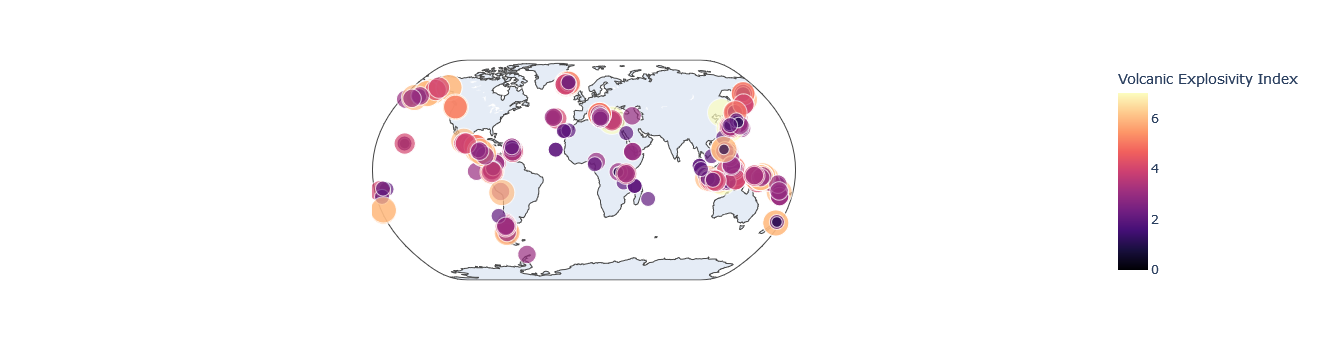

In [7]:
fig = px.scatter_geo(df, 
                     lat='Latitude', lon='Longitude',
                     size='Volcanic Explosivity Index',
                     color='Volcanic Explosivity Index',
                     projection='natural earth',
                     color_continuous_scale=px.colors.sequential.Magma,
                     width=800,
                    )

fig.show()
fig.write_image('volcano1.svg', scale=1.0)

### 2 - Scatter plot: Types of volcanoes

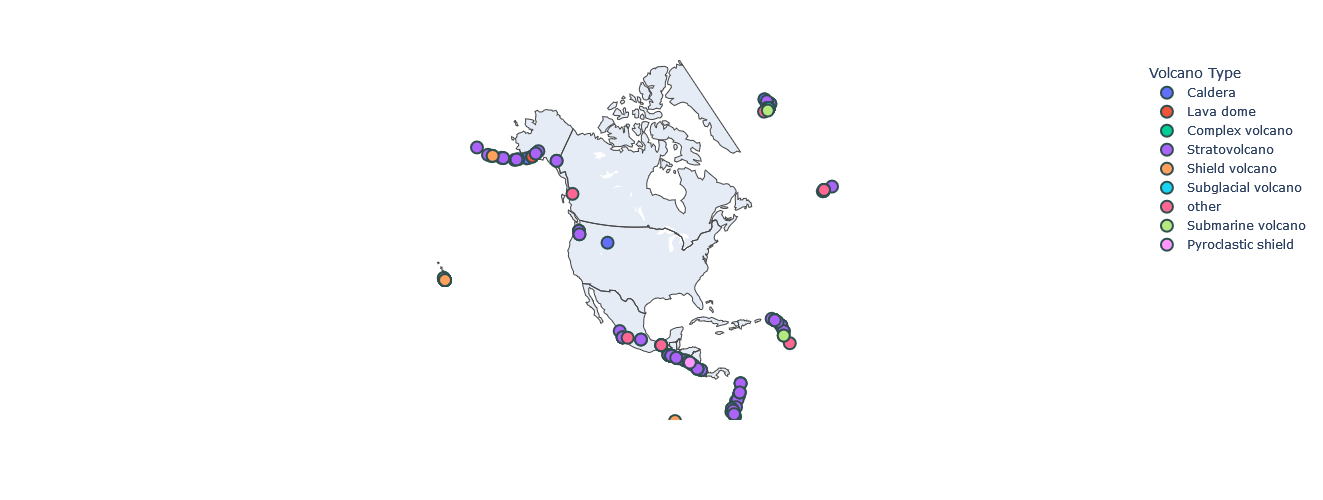

In [8]:
fig = px.scatter_geo(df, 
                     lat='Latitude', lon='Longitude',
                     color='Volcano Type',
                     width=700, height=500,
                     scope='north america',
                    )
fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')),
                  mode='markers',
                  selector=dict(mode='markers'))
fig.show()
fig.write_image('volcano2.svg', scale=1.0)

### 3 - With Tsunami on terrain map

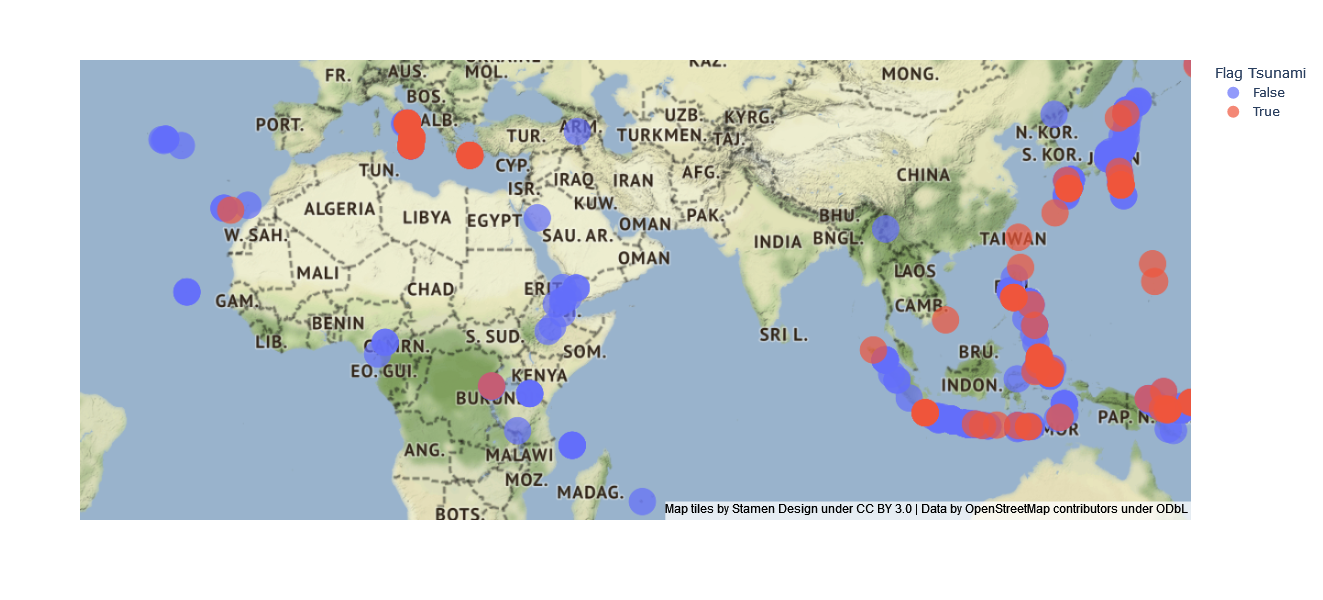

In [9]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude', color='Flag Tsunami', size=[10]*len(df),
                        mapbox_style="stamen-terrain", zoom=2, 
                        width=800, height=600,
                       )
fig.show()

### 4 - With Tsunami on terrain map

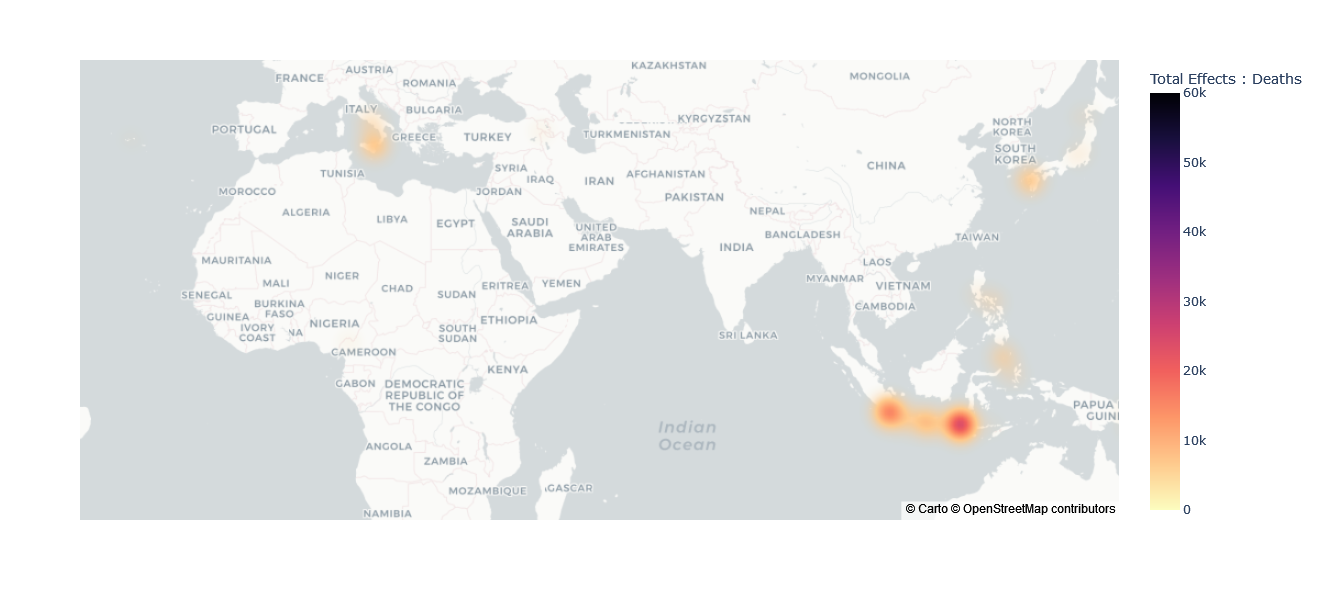

In [10]:
fig = px.density_mapbox(df, lat='Latitude', lon='Longitude', z='Total Effects : Deaths', 
                        mapbox_style="carto-positron", zoom=2, 
                        width=800, height=600,
                        color_continuous_scale=px.colors.sequential.Magma_r,
                       )
fig.show()

### 5 - Other map projection

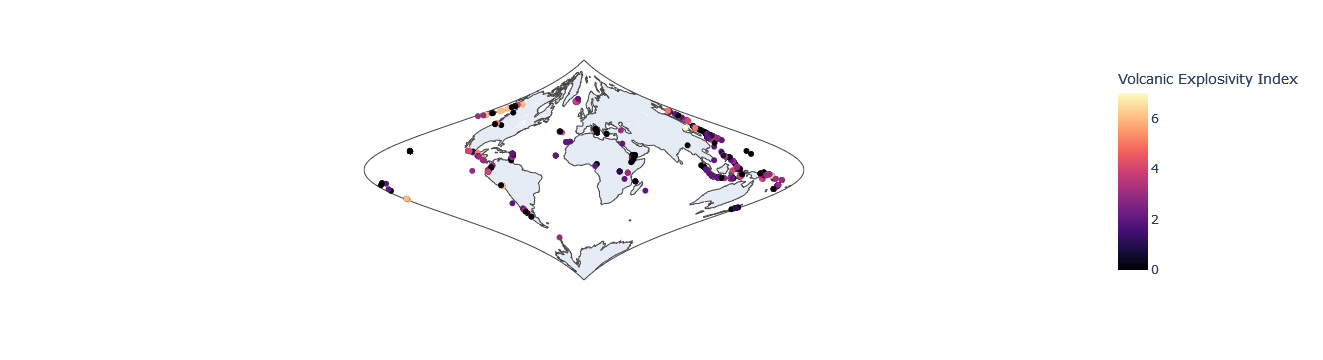

In [11]:
fig = px.scatter_geo(df, 
                     lat='Latitude', lon='Longitude',
                     color='Volcanic Explosivity Index',
                     projection='foucaut',
                     color_continuous_scale=px.colors.sequential.Magma,
                     width=800, 
                    )

fig.show()
fig.write_image('volcano5.svg', scale=1.0)